In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Load Data
train = pd.read_csv('data/train.csv')
validation = pd.read_csv('data/dev.csv')

In [3]:
train

,text,label
0,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,1
1,এই বিচার শেষ বিচার নয়।আসল বিচার হবে আল্লাহর আদ...,0
2,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,2
3,দেশটা সুস্থ নাই,0
4,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,0
...,...,...
2695,"হল বন্ধ করার আগে নিউমার্কেট বন্ধ করা উচিৎ,,।",2
2696,এ স্বাধীন দেশে ভোটটা অন্ততঃ আমাদের দিতে দেন।জা...,0
2697,আল হামদুলিল্লাহ্...প্রিয় ভিউয়ার্স আপনাদের ভালব...,0
2698,এই গুলা ত বিচার করবায় ঐ তোমরা ত ইন্ডিয়ান না,0


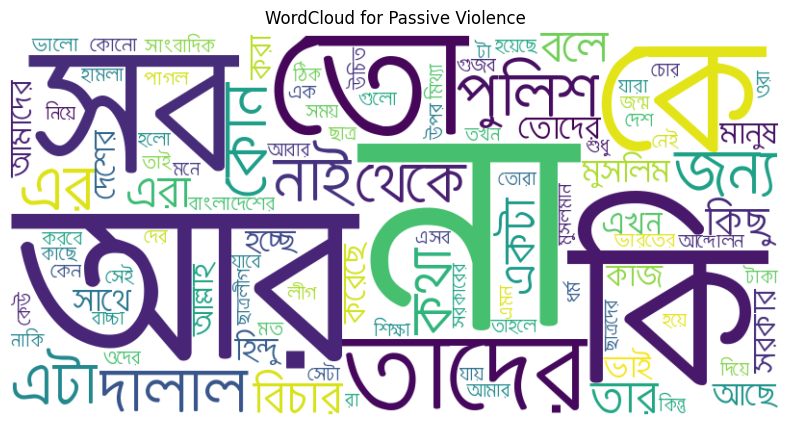

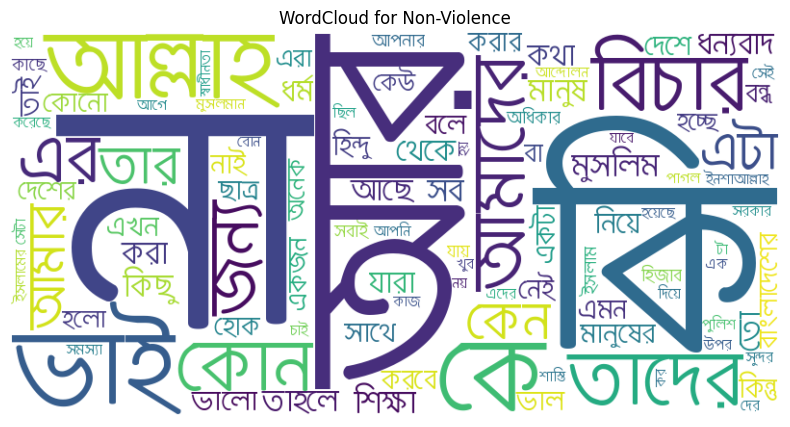

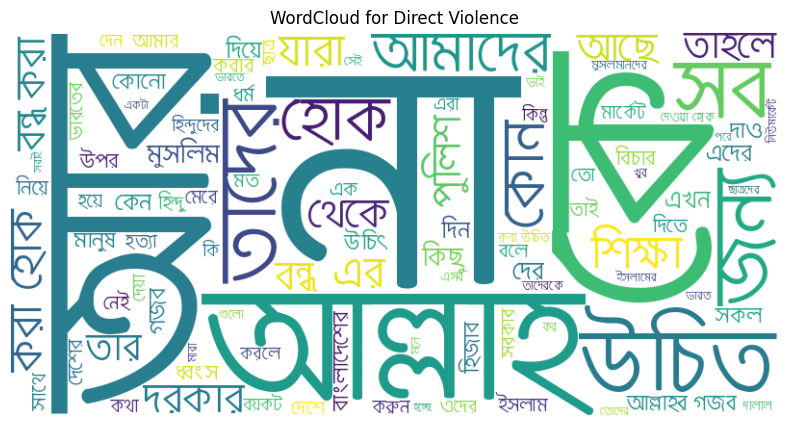

In [29]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/fonts-beng-extra/Mukti.ttf'

# List of Bengali stop words. This is just a small example list. 
# Ideally, you'd want a more comprehensive list of Bengali stop words.
bengali_stopwords = set([
    "এ", "তুমি", "সে", "আমি", "আমরা", "তারা", "এই", "ও", "করে", "করতে", 
    "করছে", "হয়", "হবে", "এবং", "অথবা", "তবে", "যে", "যদি"
    # ... add more Bengali stop words here
])

def remove_stopwords(text, stopwords):
    """Remove stop words from the text."""
    words = re.findall(r'[\u0980-\u09FF]+', text)
    important_words = [word for word in words if word not in stopwords]
    return " ".join(important_words)

def generate_wordcloud(text, title):
    text_without_stopwords = remove_stopwords(text, bengali_stopwords)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, font_path=path, regexp=r'[\u0980-\u09FF]+').generate(text_without_stopwords)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

id2label = {
    0: 'Non-Violence',
    1: 'Passive Violence',
    2: 'Direct Violence'
}

for label in train['label'].unique():
    combined_text = ' '.join(train[train['label'] == label]['text'])
    generate_wordcloud(combined_text, f"WordCloud for {id2label[label]}")


### TF IDF

In [40]:
stop_words = pd.read_excel('./resources/stopwords_bangla.xlsx')

In [44]:
stop_words_list = stop_words['words'].tolist()

In [45]:
stop_words_list

['অই',
 'অগত্যা',
 'অত: পর',
 'অতএব',
 'অথচ',
 'অথবা',
 'অধিক',
 'অধীনে',
 'অধ্যায়',
 'অনুগ্রহ',
 'অনুভূত',
 'অনুযায়ী',
 'অনুরূপ',
 'অনুসন্ধান',
 'অনুসরণ',
 'অনুসারে',
 'অনুসৃত',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অন্যত্র',
 'অন্যভাবে',
 'অন্যান্য',
 'অপেক্ষাকৃতভাবে',
 'অবধি',
 'অবশ্য',
 'অবশ্যই',
 'অবস্থা',
 'অবিলম্বে',
 'অভ্যন্তরস্থ',
 'অর্জিত',
 'অর্থাত',
 'অসদৃশ',
 'অসম্ভাব্য',
 'আইন',
 'আউট',
 'আক্রান্ত',
 'আগামী',
 'আগে',
 'আগেই',
 'আগ্রহী',
 'আছে',
 'আজ',
 'আট',
 'আদেশ',
 'আদ্যভাগে',
 'আন্দাজ',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদিগের',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'আশি',
 'আশু',
 'আসা',
 'আসে',
 'ই',
 'ইচ্ছা',
 'ইচ্ছাপূর্বক',
 'ইতিমধ্যে',
 'ইতোমধ্যে',
 'ইত্যাদি',
 'ইশারা',
 'ইহা',
 'ইহাতে',
 'উক্তি',
 'উচিত',
 'উচ্চ',
 'উঠা',
 'উত্তম',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'উপলব্ধ',
 'উপায়',
 'উভয়',
 'উল্লেখ',
 'উল্লেখযোগ্যভাবে',
 'উহার',
 'ঊর্ধ্বতন',
 'এ',
 'এপর্যন্ত',
 'এঁদের',
 'এঁরা',
 'এই',
 'এইগুলো',
 'এইভাবে',
 'এক',
 'একই

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Custom stop words list (you can expand this based on your observations)
custom_stop_words = stop_words_list

vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(1,2), min_df=2)

important_terms_by_label = {}

for label in train['label'].unique():
    texts = train[train['label'] == label]['text'].tolist()
    
    X = vectorizer.fit_transform(texts)
    
    df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
    summed = df.sum(axis=0)
    sorted_terms = summed.sort_values(ascending=True)
    important_terms_by_label[label] = sorted_terms.head(10).index.tolist()

print(important_terms_by_label)


{1: ['একট উচ', 'সম পদ', 'আম সলম', 'আল রআন', 'কর খত', 'করব আম', 'নও', 'রত ইত', 'কর ওস', 'অন মন'], 0: ['কর জয', 'মধ একট', 'ভক এব', 'ইসল কব', 'করত রন', 'আস আম', 'রত যবস', 'আপন রব', 'কর পড়ব', 'এট রত'], 2: ['অঙ', 'আম রআন', 'আফগ', 'কর মল', 'আছ আছ', 'অবশ যই', 'অবশ', 'বয কট', 'বয', 'মন আম']}


/home/rohan/miniconda3/envs/textclassification/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['অগত', 'অত', 'অথব', 'অধ', 'অন', 'অপ', 'অব', 'অবধ', 'অবশ', 'অবস', 'অভ', 'অর', 'অসদ', 'অসম', 'আক', 'আগ', 'আছ', 'আদ', 'আন', 'আপন', 'আব', 'আম', 'আমর', 'আশ', 'আস', 'ইচ', 'ইত', 'ইন', 'ইয', 'ইর', 'ইশ', 'ইহ', 'উই', 'উক', 'উচ', 'উঠ', 'উত', 'উন', 'উপ', 'উপলব', 'উভয', 'উল', 'উহ', 'ঊর', 'এইগ', 'এইভ', 'একট', 'একদ', 'একব', 'একভ', 'একসঙ', 'এখ', 'এছ', 'এট', 'এতট', 'এতদ', 'এদ', 'এপর', 'এব', 'এমনক', 'ওক', 'ওখ', 'ওদ', 'ওয', 'ওহ', 'ওয়', 'কআছ', 'কক', 'কট', 'কব', 'কভ', 'কমন', 'কয', 'কর', 'করছ', 'করণ', 'করত', 'করব', 'করল', 'কয়', 'খত', 'খয', 'গক', 'গড', 'চক', 'চম', 'চল', 'ছক', 'ছন', 'ছয', 'জছ', 'জনক', 'টত', 'টতই', 'টপ', 'ডগ', 'ণত', 'ণন', 'তথ', 'তদ', 'তদন', 'তন', 'তপক', 'তব', 'তভ', 'তম', 'তর', 'তরস', 'থম', 'দরক', 'দলবদ', 'ধর', 'নও', 'নজন', 'নত', 'নতন', 'নব', 'নভ', 'নয', 'নসই', 'পক'